In [89]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
from datetime import datetime
from scipy import stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Exploratory Data Analysis

In [38]:
df = pd.read_json(r'C:\Users\spider\Documents\Springboard\GitHub\Springboard\Effective_Interviewing_For_Data_Scientists\Ultimate technologies take home challenge\dataset\logins.json')

In [39]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [40]:
df.set_index('login_time', inplace=True)

In [41]:
df['login_count'] = 1

Aggregating login counts on 15 minutes time duration

In [42]:
df_15 = df.resample('15min').sum()

In [43]:
df_15.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


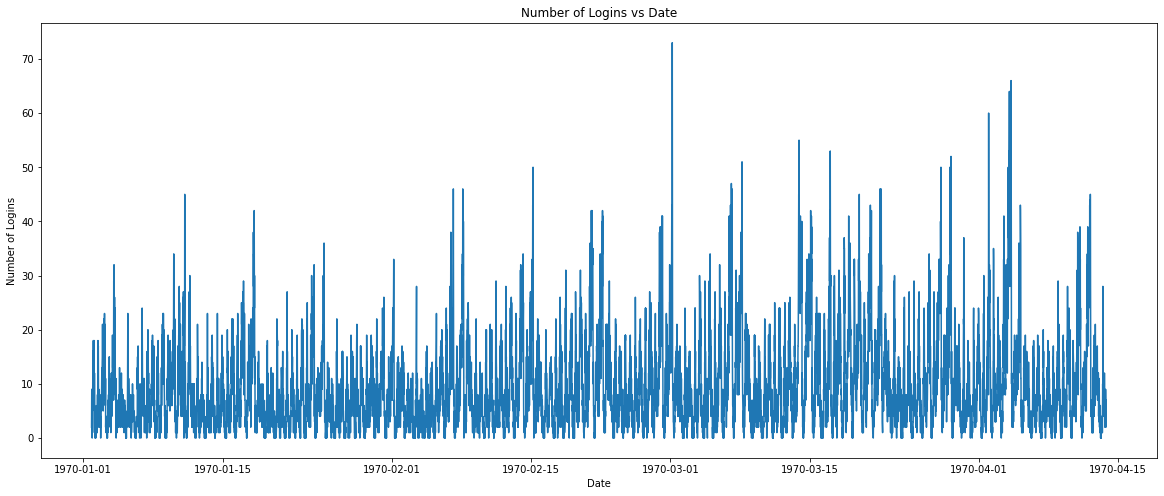

In [44]:
plt.figure(figsize=(20,8))
plt.plot(df_15)
plt.title("Number of Logins vs Date")
plt.xlabel("Date")
plt.ylabel("Number of Logins")
plt.show()

## Plotting data by month

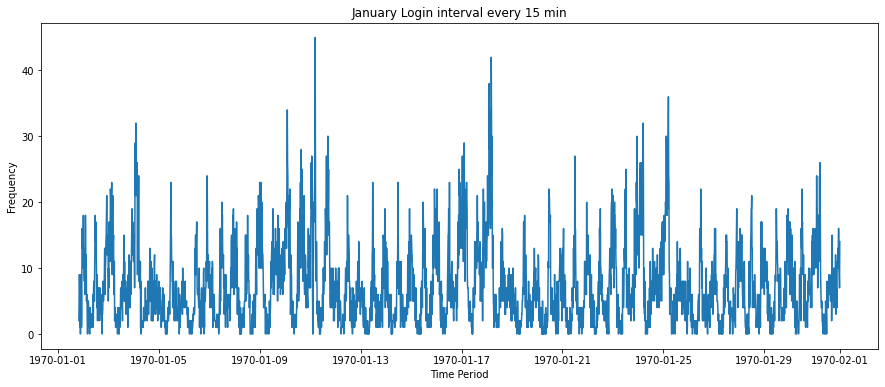

In [45]:
plt.figure(figsize=(15,6))
plt.plot(df_15.loc['1970-01-01':'1970-01-31'])
plt.title('January Login interval every 15 min')
plt.xlabel('Time Period')
plt.ylabel('Frequency');

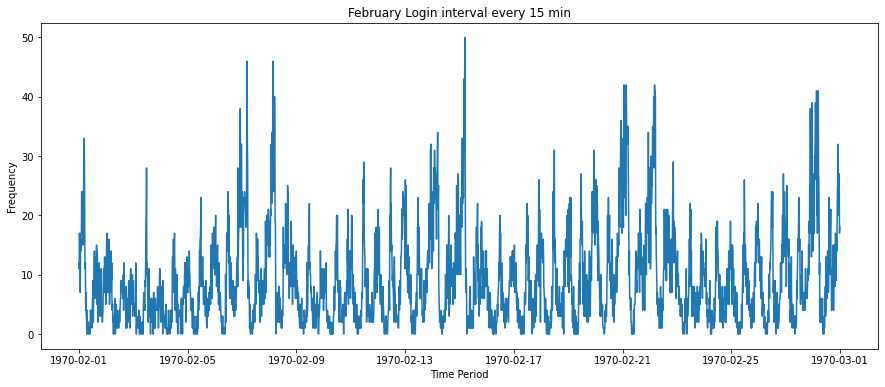

In [46]:
plt.figure(figsize=(15,6))
plt.plot(df_15.loc['1970-02-01':'1970-02-28'])
plt.title('February Login interval every 15 min')
plt.xlabel('Time Period')
plt.ylabel('Frequency');

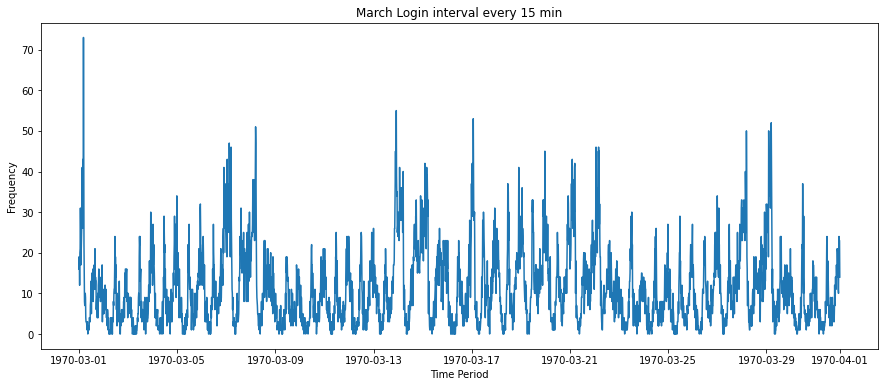

In [47]:
plt.figure(figsize=(15,6))
plt.plot(df_15.loc['1970-03-01':'1970-03-31'])
plt.title('March Login interval every 15 min')
plt.xlabel('Time Period')
plt.ylabel('Frequency');

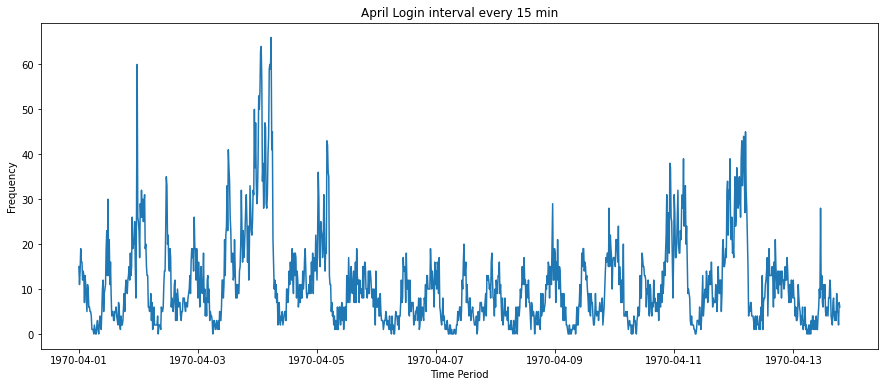

In [48]:
plt.figure(figsize=(15,6))
plt.plot(df_15.loc['1970-04-01':'1970-04-30'])
plt.title('April Login interval every 15 min')
plt.xlabel('Time Period')
plt.ylabel('Frequency');

In [54]:
df_daily = df_15.resample('D').sum()

In [55]:
day = df_daily
day['day'] = day.index.weekday
day.head()

,login_count,weekday,day
login_time,,,
1970-01-01,112,48,3
1970-01-02,681,384,4
1970-01-03,793,480,5
1970-01-04,788,576,6
1970-01-05,459,0,0


Plotting data by weekday

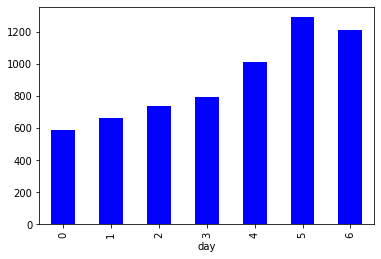

In [57]:
day.groupby('day')['login_count'].mean().plot(kind='bar', color='blue');

We can observe that Saturdays and Sundays have the most login counts.

# Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? 

Depending on the demand the driver partners show activeness, for most active cities we can reimburse the tolls for the driver partners. Here in the Ultimate Metroplois, we can reimburse them during the day time and in the Ultimate Gotham, we can reimburse during the night while we can reimburse for both in the weekends. This will make both partners to follow their scheduled times and encourage more drivers to join. We can also look demand at peak times for both cities and reimburse tolls during those peak hours.

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

We can perform an A/B Test. The control group would be users that do not use the toll bridge. And the test group would be users that do use the toll bridge. We'll have to keep track of the revenue gained from both sides and compare it against each other within a few months. Or if you want a more accurate reading, we can collect the data within a year's time.

a. How you will implement the experiment

We can conduct a t-test as statistical test, with a p-value of 0.5.

b. What statistical test(s) you will conduct to verify the significance of the observation

There are 3 ways to interpret the results. One would be if there's no increase in profit. If this happens, then we'll need to conduct more studies and see what's causing the problem. If there is no increase in profit, then we'll have to wait it out and see what else can be done. If there is profit, then we can look at what factors contributed the most to an increase in profit and maybe optimize from there.

c. How you would interpret the results and provide recommendations to the city operations team along with any caveats.

It would be hard for us to evaluate the performance of this experiment in a short period of time. This experiment will have to be monitored for a while and adjustments will have to be made yearly or periodically at the least.

# Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Data Description
city: city this user signed up in
phone: primary device for this user
signup_date: date of account registration; in the form ‘YYYYMMDD’
last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
avg_dist: the average distance in miles per trip taken in the first 30 days after signup
avg_rating_by_driver: the rider’s average rating over all of their trips
avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
surge_pct: the percent of trips taken with surge multiplier > 1
avg_surge: The average surge multiplier over all of this user’s trips
trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
weekday_pct: the percent of the user’s trips occurring during a weekday

## Load Data

In [58]:
with open(r"C:\Users\spider\Documents\Springboard\GitHub\Springboard\Effective_Interviewing_For_Data_Scientists\Ultimate technologies take home challenge\dataset\ultimate_data_challenge.json") as json_ult:
    data=json.load(json_ult)

df =json_normalize(data)

df.head()

C:\Users\spider\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [59]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


## Data Cleaning

In [60]:
print(df.shape)
print(df.isnull().sum())

(50000, 12)
city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


In [61]:
# Fixing null values by giving them the avg value.
df["avg_rating_of_driver"].fillna(df["avg_rating_of_driver"].mean(), inplace=True)
df["avg_rating_by_driver"].fillna(df["avg_rating_by_driver"].mean(), inplace=True)
df['phone'].fillna('iPhone',inplace=True)

In [62]:
print(df.isnull().sum())

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


In [63]:
# Converting date columns to datetime objects
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [65]:
df.sort_values(by='last_trip_date', ascending = False)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
4486,Winterfell,4,2014-01-25,5.000000,1.00,2014-07-01,Android,0.0,True,25.0,11.94,5.0
43047,King's Landing,1,2014-01-15,5.000000,1.01,2014-07-01,iPhone,0.8,True,89.3,5.49,4.7
24059,Astapor,1,2014-01-24,4.300000,1.11,2014-07-01,iPhone,14.3,False,71.4,8.62,4.9
40290,King's Landing,2,2014-01-07,4.900000,1.02,2014-07-01,iPhone,1.6,True,95.2,7.51,4.8
28689,King's Landing,5,2014-01-16,5.000000,1.00,2014-07-01,iPhone,0.0,False,75.0,16.32,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23907,Winterfell,1,2014-01-01,5.000000,3.00,2014-01-01,Android,100.0,False,100.0,3.36,5.0
47804,Astapor,1,2014-01-01,4.601559,1.00,2014-01-01,Android,0.0,True,100.0,7.17,5.0
11578,Winterfell,1,2014-01-01,4.601559,1.00,2014-01-01,Android,0.0,True,100.0,18.63,5.0
11573,Astapor,1,2014-01-01,4.601559,1.25,2014-01-01,iPhone,100.0,False,100.0,2.47,5.0


In [66]:
# Adding a column for the target variable
df.loc[df['last_trip_date'] > '2014-06-01', 'Customer_Retention'] = 'Active'
df.loc[df['last_trip_date'] <= '2014-06-01', 'Customer_Retention'] = 'Inactive'

## Exploratory Data Analysis

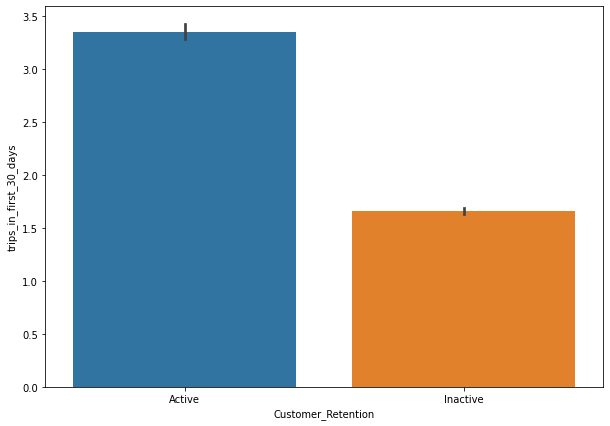

In [69]:
plt.figure(figsize=(10,7))
sns.barplot(x="Customer_Retention", y="trips_in_first_30_days", data=df);

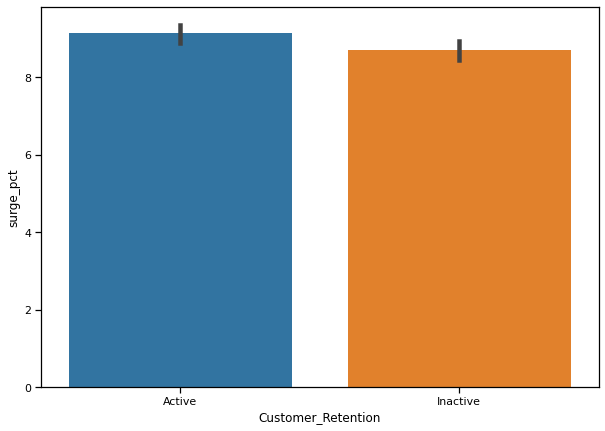

In [74]:
plt.figure(figsize=(10,7))
sns.barplot(x="Customer_Retention", y="surge_pct", data=df);

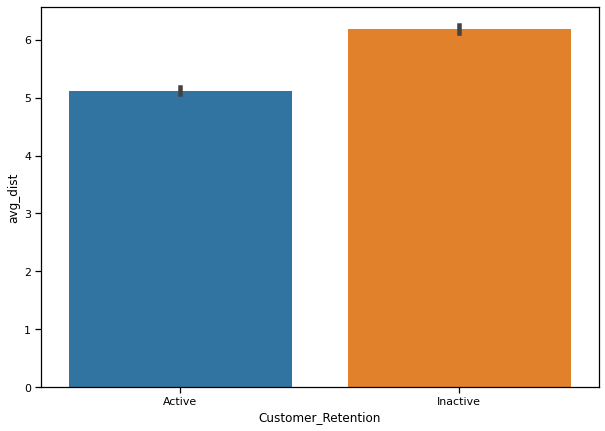

In [75]:
plt.figure(figsize=(10,7))
sns.barplot(x="Customer_Retention", y="avg_dist", data=df);

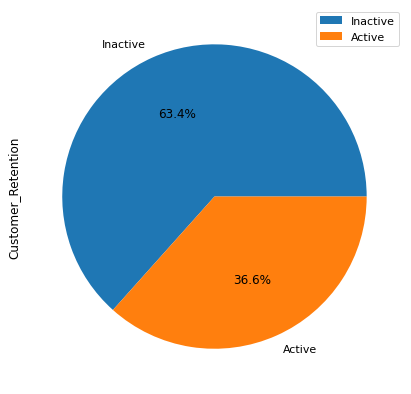

In [77]:
plt.figure(figsize=(10,7))
df.Customer_Retention.value_counts(sort=False).plot.pie(autopct='%1.1f%%', legend=True);

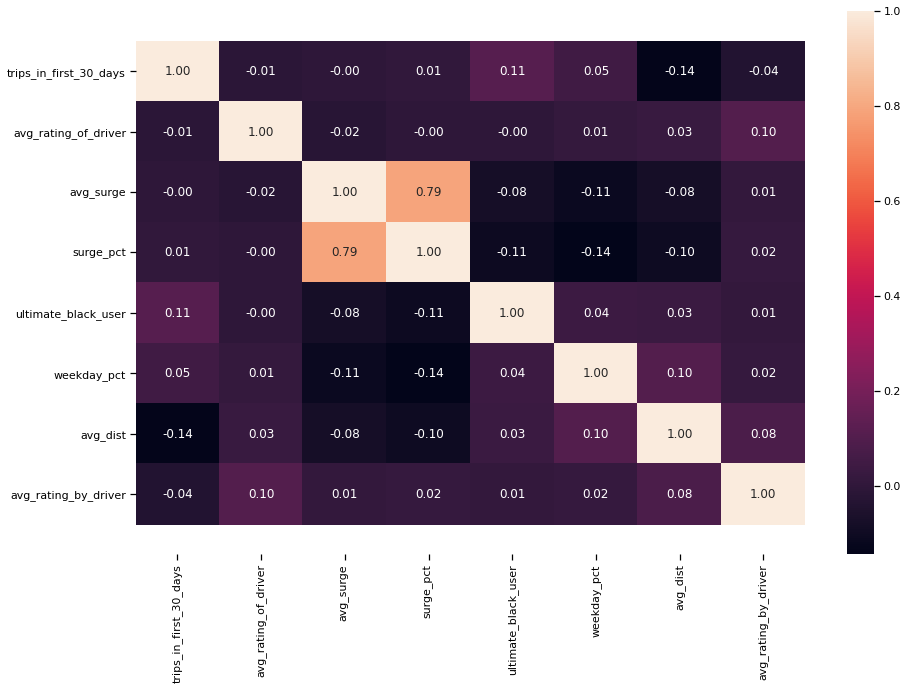

In [71]:
# plot heatmap to visualize correlation of numeric features
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
ax = sns.heatmap(df.corr(), annot = True, fmt = ".2f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [83]:
# convert all categorical features to numeric 
ohe_df = pd.get_dummies(df, drop_first=True)

In [84]:
ohe_df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,Customer_Retention_Inactive
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,0,0,1
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,0,1,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,1,0,1


In [85]:
# Adding a retained label and set values to 0
ohe_df["Retained"] = 0
# Active users will have a value of 1 if they were active within the past 30 days
ohe_df.loc[ohe_df['last_trip_date'] >= "2014-06-01", "Retained"] = 1

In [86]:
# Drop last_trip_date and signup_date because it won't useful with model
ohe_df.drop(['last_trip_date', 'signup_date'], axis=1, inplace=True)

## Model Building

In [87]:
# Remove target feature to train and test data
X = ohe_df.drop('Retained', axis=1)
y = ohe_df['Retained']

In [90]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

## Logistic Regression

In [93]:
# Searching for best parameter of 'C' using cross validation

parameters2 = [{'C': [.01,.1,1,10]}]

lr= LogisticRegression(max_iter=10000)


grid_search2 = GridSearchCV(estimator = lr, param_grid = parameters2, scoring = 'roc_auc', cv=5)
grid_search2 = grid_search2.fit(X_train, y_train) 

lr_auc1= grid_search2.best_score_

print(lr_auc1)
print(grid_search2.best_params_);

C:\Users\spider\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\spider\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\spider\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\spider\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\spider\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

0.9923880162458197
{'C': 10}


## Random Forest

In [91]:
# Searching for best parameter of 'n_estimators' using cross validation

parameters = [{'n_estimators': [10,50,100]}]

rf_class= RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator = rf_class, param_grid = parameters, scoring = 'roc_auc', cv=5)
grid_search = grid_search.fit(X_train, y_train) 

RF_auc1= grid_search.best_score_

print(RF_auc1)
print(grid_search.best_params_)

0.9927769683997625
{'n_estimators': 100}


In [96]:
rf_pred_proba = grid_search.predict_proba(X_test)[:,1]

In [97]:
roc_auc_score(y_test, rf_pred_proba)

0.9915251692829123

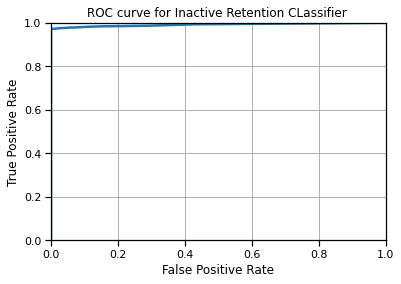

In [98]:
fpr,tpr, thresholds = roc_curve(y_test, rf_pred_proba)

plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Inactive Retention CLassifier ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [99]:
rf_pred = grid_search.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6219
           1       1.00      0.97      0.99      3781

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [100]:
print(confusion_matrix(y_test, rf_pred))

[[6210    9]
 [ 103 3678]]
